## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [1]:
import numpy as np
import pandas as pd

reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)

display(reviews.head())
display(labels.head())
display(Y.head())

,0
0,bromwell high is a cartoon comedy . it ran at ...
1,story of a man who has unnatural feelings for ...
2,homelessness or houselessness as george carli...
3,airport starts as a brand new luxury pla...
4,brilliant over acting by lesley ann warren . ...


,0
0,positive
1,negative
2,positive
3,negative
4,positive


,0
0,1
1,0
2,1
3,0
4,1


**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_temp, X_test, y_temp, y_test = train_test_split(
    reviews, Y, test_size=0.2, random_state=42, stratify=Y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))


vectorizer = CountVectorizer(binary=True)  # binary=True: only 0/1 if word appears

X_train_vec = vectorizer.fit_transform(X_train[0])
X_val_vec = vectorizer.transform(X_val[0])
X_test_vec = vectorizer.transform(X_test[0])

Train size: 15000
Validation size: 5000
Test size: 5000


**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

In [3]:
print("Vocabulary:", vectorizer.vocabulary_)
print("Index of word 'good':", vectorizer.vocabulary_.get('good'))

Vocabulary: {'did': 14100, 'not': 36724, 'expect': 18096, 'lot': 31387, 'from': 20620, 'this': 53609, 'movie': 35175, 'after': 852, 'the': 53422, 'terrible': 53266, 'life': 30718, 'is': 27528, 'miracle': 34215, 'it': 27607, 'turns': 55290, 'out': 37870, 'that': 53408, 'ten': 53146, 'times': 53926, 'worse': 59385, 'than': 53392, 'have': 23809, 'impression': 26128, 'director': 14331, 'writer': 59506, 'just': 28492, 'joking': 28237, 'with': 59103, 'audience': 3175, 'let': 30548, 'me': 33250, 'see': 47087, 'how': 25237, 'much': 35253, 'emptiness': 16890, 'can': 7579, 'you': 59876, 'sustain': 52132, 'dialogues': 14031, 'are': 2484, 'empty': 16891, 'scenario': 46500, 'minimalistic': 34150, 'in': 26181, 'few': 19134, 'moments': 34667, 'photography': 39754, 'really': 43140, 'nice': 36311, 'sarcastic': 46184, 'lines': 30903, 'semi': 47215, 'funny': 20799, 'but': 7219, 'hard': 23570, 'to': 54070, 'genuinely': 21446, 'laugh': 30105, 'during': 15956, 'comedy': 10143, 've': 57120, 'laughed': 30108,

In [4]:
sample_text = X_train.iloc[0, 0]
print("Original text:\n", sample_text)

vectorized = vectorizer.transform([sample_text])
print("Vector shape:", vectorized.shape)
print("Non-zero entries (word positions that appear):", vectorized.nonzero()[1])

Original text:
 i did not expect a lot from this movie  after the terrible  life is a miracle  . it turns out that this movie is ten times worse than  life . . .  . i have impression that director  writer is just joking with the audience  let me see how much emptiness can you  audience  sustain  . dialogues are empty  . . . scenario is minimalistic . in few moments  photography is really nice . few sarcastic lines are semi  funny  but it is hard to genuinely laugh during this  comedy  . i  ve laughed to myself for being able to watch the movie until the end . if you can lift yourself above this director  s fiasco  . . . you will find good acting of few legends  miki manojlovic  aleksandar bercek   and very good performance of emir  s son stribor kusturica .  br    br   in short too bad for such a great director  emir kusturica is still young and should be making top  rated movies . instead  he chooses to do this low  budget just  for  my  private theater movie  with arrogant attitude t

**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers

model = Sequential([
    layers.Input(shape=(X_train_vec.shape[1],)),  # Input: one node per feature
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.4),  # Dropout to prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Output: binary class
])

model.compile(
    optimizer='adam',                   # Adaptive optimizer
    loss='binary_crossentropy',         # For binary classification
    metrics=['accuracy']
)

history = model.fit(
    X_train_vec.toarray(), y_train.values,     # Train data
    validation_data=(X_val_vec.toarray(), y_val.values),  # Validation data
    epochs=10,                                 # Number of training passes
    batch_size=32                              # Mini-batch size
)

val_loss, val_acc = model.evaluate(X_val_vec.toarray(), y_val.values)
print("Validation Accuracy:", val_acc)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8074 - loss: 0.5277 - val_accuracy: 0.8754 - val_loss: 0.5237
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9186 - loss: 0.4359 - val_accuracy: 0.8782 - val_loss: 0.5262
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9277 - loss: 0.4169 - val_accuracy: 0.8620 - val_loss: 0.5696
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9322 - loss: 0.4177 - val_accuracy: 0.8760 - val_loss: 0.5551
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9408 - loss: 0.4105 - val_accuracy: 0.8826 - val_loss: 0.5670
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9461 - loss: 0.3892 - val_accuracy: 0.8776 - val_loss: 0.5656
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9506 - loss: 0.3948 - val_accuracy: 0.8792 - val_loss: 0.5806
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9526 - loss: 0.3869 - 

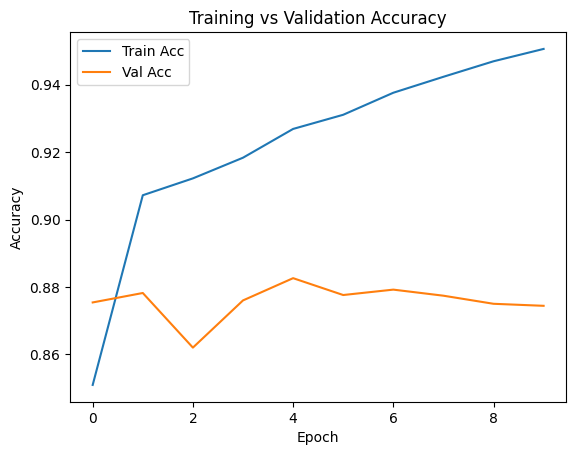

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

**(d)** Test your sentiment-classifier on the test set.

In [7]:
test_loss, test_acc = model.evaluate(X_test_vec.toarray(), y_test.values)
print("Test Accuracy:", test_acc)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8628 - loss: 0.6131
Test Accuracy: 0.8600000143051147


In [8]:
from sklearn.metrics import classification_report

# Predict labels (probabilities → binary class)
y_test_pred_probs = model.predict(X_test_vec.toarray())
y_test_pred = (y_test_pred_probs > 0.5).astype(int)  # threshold at 0.5

# Report
print(classification_report(y_test, y_test_pred))

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2500
           1       0.88      0.83      0.86      2500

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


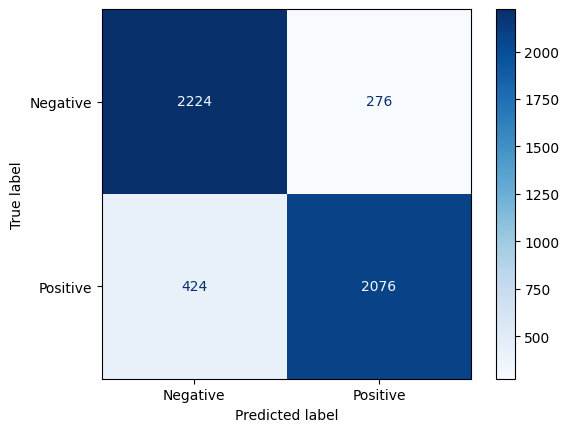

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_test_pred_probs = model.predict(X_test_vec.toarray())
y_test_pred = (y_test_pred_probs > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')

**(e)** Use the classifier to classify a few sentences you write yourselves. 

In [11]:
my_reviews = [
    "This movie was absolutely amazing! I loved every second of it.",
    "The plot was boring and the acting was terrible.",
    "The best class, Richard is the G.O.A.T.",
    "It was okay, not great but not the worst either."
    "I hated the ending, but the cinematography was beautiful.",
    "This is the best film I’ve seen in years!"
]

my_reviews_vec = vectorizer.transform(my_reviews)
my_preds = model.predict(my_reviews_vec.toarray())

for review, prob in zip(my_reviews, my_preds):
    label = "Positive" if prob > 0.5 else "Negative"
    print(f"{label.upper()} ({prob[0]:.2f}): {review}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
POSITIVE (0.90): This movie was absolutely amazing! I loved every second of it.
NEGATIVE (0.02): The plot was boring and the acting was terrible.
POSITIVE (0.93): The best class, Richard is the G.O.A.T.
NEGATIVE (0.09): It was okay, not great but not the worst either.I hated the ending, but the cinematography was beautiful.
POSITIVE (0.96): This is the best film I’ve seen in years!
